# Exercises

The aim of these exercises is for you to derive simple functions based on phylo2vec definitions and functions we saw in the tutorial. You will also learn how to test the validity and benchmark the efficiency of your implementations using `pytest` and `pytest-benchmark`, respectively.

## Imports

In [1]:
import os

import numpy as np
import phylo2vec as p2v

os.chdir("../")

bench_dir = "src/benchmarks"
test_dir = "src/tests"

## Testing with `pytest`

The `pytest` framework makes it easy to write small, readable tests for Python applications and libraries.

We have already added the package to our repository via `pixi add pytest`.

To write a test, create a python file starting with `test_`. Define test functions starting with `test_`.

See the example below of `tests/test_example.py`:

In [2]:
from IPython.display import Markdown

# Read the file and display in markdown
with open(f'{test_dir}/test_example.py', 'r') as f:
    benchmark_content = f.read()

Markdown(
f"""
```python
{benchmark_content}
```
"""
)


```python
import numpy as np
import phylo2vec as p2v
import pytest

from src.example import fibonacci


# Test function for `fibonacci`
def test_fibonacci():
    assert fibonacci(10) == 55
    assert fibonacci(20) == 6765
    assert fibonacci(30) == 832040


# Test function for `fibonacci`
def test_fail_fibonacci():
    assert fibonacci(10) == 54  # This test is expected to fail


@pytest.mark.parametrize("n_leaves", range(5, 50))
def test_from_and_to_newick(n_leaves):
    v = p2v.sample_vector(n_leaves)
    newick = p2v.to_newick(v)
    v2 = p2v.from_newick(newick)
    assert np.array_equal(v, v2)

```


To run tests, simply run: 

In [3]:
!pixi run pytest $test_dir -v

⠁ activating environment                                                        ============================= test session starts ==============================
platform linux -- Python 3.11.13, pytest-8.4.2, pluggy-1.6.0 -- /workspaces/phylo2vec-workshop/.pixi/envs/default/bin/python3.11
cachedir: .pytest_cache
benchmark: 5.1.0 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /workspaces/phylo2vec-workshop
plugins: benchmark-5.1.0, anyio-4.10.0
collected 47 items                                                             

src/tests/test_example.py::test_fibonacci PASSED                         [  2%]
src/tests/test_example.py::test_fail_fibonacci FAILED                    [  4%]
src/tests/test_example.py::test_from_and_to_newick[5] PASSED             [  6%]
src/tests/test_example.py::test_from_and_to_newick[6] PASSED             [  8%]
src/tests/test_example.py::te

`pytest` automatically discovers files and functions starting with `test_`. 
It will show a summary of passed and failed tests.

The `-v` option is optional, but helps visualizing which tests passed/failed.

## Benchmarking with pytest-benchmark

The `pytest-benchmark` is a package that integrates with `pytest` to measure and report performance of your code. It uses a similar syntax as `pytest` tests.

We have already added the package to our repository via `pixi add pytest-benchmark`.

To write a test, create a python file starting with `test_`. Define test functions starting with `test_`.

See the example below of `src/benchmarks/test_bench.py`:

In [4]:
# Read the file and display in markdown
with open(f"{bench_dir}/test_bench.py", "r") as f:
    benchmark_content = f.read()

Markdown(
    f"""
```python
{benchmark_content}
```
"""
)


```python
"""Example benchmarks."""

import pytest

import phylo2vec as p2v

from src.example import fibonacci

# 100, 200, ..., 900
BENCHMARK_RANGE = range(100, 1000, 100)


# Test the fibonacci function
@pytest.mark.parametrize("sample_size", BENCHMARK_RANGE)
def test_fibonacci(benchmark, sample_size):
    benchmark(fibonacci, sample_size)


# Test the sample_vector function from phylo2vec
@pytest.mark.parametrize("sample_size", BENCHMARK_RANGE)
def test_p2v_sample_vector(benchmark, sample_size):
    benchmark(p2v.sample_vector, sample_size)

```


To run a benchmark, you can simply run:

In [5]:
!pixi run pytest $bench_dir

⠁ activating environment                                                        ============================= test session starts ==============================
platform linux -- Python 3.11.13, pytest-8.4.2, pluggy-1.6.0
benchmark: 5.1.0 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /workspaces/phylo2vec-workshop
plugins: benchmark-5.1.0, anyio-4.10.0
collected 18 items                                                             

src/benchmarks/test_bench.py ..................                          [100%]

=============================== warnings summary ===============================
.pixi/envs/default/lib/python3.11/site-packages/ete3/webplugin/webapp.py:44
  /workspaces/phylo2vec-workshop/.pixi/envs/default/lib/python3.11/site-packages/ete3/webplugin/webapp.py:44: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
    import cgi


To save results, you can use the `--benchmark-autosave` option

In [6]:
!pixi run pytest $bench_dir --benchmark-autosave

⠁ activating environment                                                        ============================= test session starts ==============================
platform linux -- Python 3.11.13, pytest-8.4.2, pluggy-1.6.0
benchmark: 5.1.0 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /workspaces/phylo2vec-workshop
plugins: benchmark-5.1.0, anyio-4.10.0
collected 18 items                                                             

src/benchmarks/test_bench.py ..................                          [100%]
Saved benchmark data in: /workspaces/phylo2vec-workshop/.benchmarks/Linux-CPython-3.11-64bit/0002_c5d0e011fb6e64de7b82770013bbea31d824a8e9_20250916_214206_uncommited-changes.json


=============================== warnings summary ===============================
.pixi/envs/default/lib/python3.11/site-packages/ete3/webplugin/webapp.py:44
  /workspaces/phylo2vec

A file will appear in the `.benchmarks` directory with the result of your benchmark. There are several options for plotting the benchmark results, we show here one with `seaborn` and `pandas`. Here is an example script:

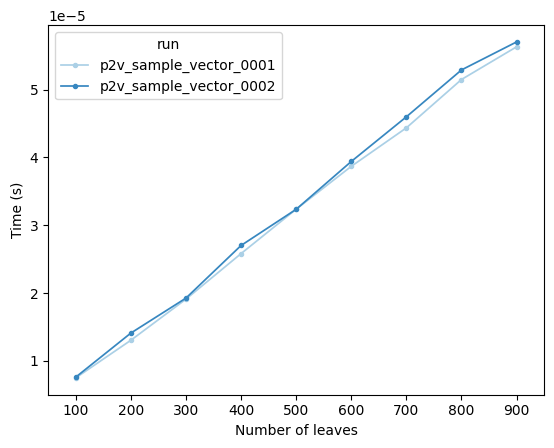

In [7]:
import json

from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dfs = []

for benchmark_file in Path(".benchmarks").rglob("*.json"):
    # Load the benchmark data
    with open(benchmark_file, "r") as f:
        data_i = json.load(f)

    df_i = pd.DataFrame(data_i["benchmarks"])

    df_i["param"] = df_i.param.astype(int)

    df_i["name"] = df_i["name"].apply(lambda x: x.replace("test_", "").split("[")[0])

    df_i = pd.concat(
        [df_i.drop("stats", axis=1), pd.json_normalize(df_i["stats"])], axis=1
    )

    df_i["cpu_time"] = df_i["mean"]
    df_i["cpu_stddev"] = df_i["stddev"]

    df_i["run"] = df_i["name"] + f"_{Path(benchmark_file).stem.split('_')[0]}"

    dfs.append(df_i)

df = pd.concat(dfs, axis=0).reset_index(drop=True).query("run.str.contains('sample')")

sns.pointplot(
    x="param",
    y="cpu_time",
    hue="run",
    palette="Blues",
    linestyles=None,
    data=df,
    markersize=3,
    linewidth=1.25,
)
plt.ylabel("Time (s)")
plt.xlabel("Number of leaves")
plt.show()

## Exercise 1: Adjacency matrix with phylo2vec

The goal of this exercise is to create an adjacency matrix using phylo2vec. 

An adjacency matrix can be used to represent any graph (and thus, any tree). It is a square matrix $A$ such that each element $A_{ij}$ is 1 when there is an edge from a node $i$ to node $j$, and 0 when there is no edge.

As a phylo2vec vector $v$ represents a **rooted** binary tree, it represents a directed graph. Thus, each edge goes from a parent to a child, but not vice versa.

To check that your function works, write a test file called `test_adjacency.py` in the **tests** directory, and run pytest to check that you pass all tests!

Example inputs and outputs:
```python
# Example 0
v0 = np.array([0, 2])
a0 = np.array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0]])
# Example 1
v1 = np.array([0, 0, 0])
a1 = np.array([[0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0]])
# Example 2
v2 = np.array([0, 1, 0])
a2 = np.array([[0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0]])
# Example 3
v3 = np.array([0, 1, 2, 3, 4])
a3 = np.array(
      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
```

In [ ]:
#################################################
############# YOUR CODE STARTS HERE #############
#################################################

def adjacency_matrix(v: np.ndarray) -> np.ndarray:
    """Create the adjacency matrix of the tree represented by a phylo2vec vector.

    Parameters
    ----------
    v: np.ndarray
        A phylo2vec vector.

    Returns
    -------
    np.ndarray
        The adjacency matrix of the tree represented by the vector.
    """
    raise NotImplementedError

#################################################
############## YOUR CODE ENDS HERE ##############

## Exercise 2: Visualising trees with phylo2vec

The goal of this exercise is to plot trees using phylo2vec. You are free to decide:
 * the language to use (Rust, R, Python, ...) 
 * the output format (ASCII, image, interactive visualisation etc.)
 * the dependencies that you may need. 

Ideally, we would like to minimize dependencies, but plotting libraries might be necessary to render nice phylogenetic trees!

Use `pytest-benchmark` to evaluate the efficiency of your solution. 

In [9]:
#################################################
############# YOUR CODE STARTS HERE #############
#################################################


def visualize_tree(v: np.ndarray):
    """Visualize the tree represented by a phylo2vec vector.

    Parameters
    ----------
    v: np.ndarray
        A phylo2vec vector.
    """
    # You may also try to plot a tree with branch lengths using the phylo2vec matrix format
    raise NotImplementedError


#################################################
############## YOUR CODE ENDS HERE ##############